<a href="https://colab.research.google.com/github/rhks13/Closure-Prediction/blob/main/%EC%83%81%EA%B6%8C%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권특성 병합데이터.csv', encoding="utf-8")
# df = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권배후지특성 병합데이터.csv', encoding="utf-8")
df

In [ ]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '시군구_코드', '시군구_코드_명', '상권_변화_지표', '상권_변화_지표_명',
       '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', 'X좌표', 'Y좌표', '행정동_코드',
       'geometry', '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수',
       '극장_수', '숙박_시설_수', '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수', '남성 상주인구 수',
       '여성 상주인구 수', '연령대 10 상주인구 수', '연령대 20 상주인구 수', '연령대 30 상주인구 수',
       '연령대 40 상주인구 수', '연령대 50 상주인구 수', '연령대 60 이상 상주인구 수', '총 가구 수',
       '아파트 가구 수', '비 아파트 가구 수', '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액',
       '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '점포수', '유사_업종_점포_수', '개업_율',
       '폐업_률', '프랜차이즈_점포_수'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196998 entries, 0 to 196997
Data columns (total 69 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   기준_년_코드           196998 non-null  int64  
 1   기준_분기_코드          196998 non-null  int64  
 2   시군구_코드            196998 non-null  int64  
 3   시군구_코드_명          196998 non-null  object 
 4   상권_변화_지표          196998 non-null  object 
 5   상권_변화_지표_명        196998 non-null  object 
 6   상권_구분_코드          196998 non-null  object 
 7   상권_구분_코드_명        196998 non-null  object 
 8   상권_코드             196998 non-null  int64  
 9   상권_코드_명           196998 non-null  object 
 10  X좌표               196998 non-null  float64
 11  Y좌표               196998 non-null  float64
 12  행정동_코드            196998 non-null  int64  
 13  geometry          196998 non-null  object 
 14  집객시설_수            192878 non-null  float64
 15  관공서_수             192878 non-null  float64
 16  은행_수              19

In [ ]:
시군구코드 = df['시군구_코드'].unique()
시군구코드명 = df['시군구_코드_명'].unique()
시군구코드 = pd.DataFrame({'시군구코드':시군구코드,'시군구코드명':시군구코드명})
시군구코드.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/시군구코드.csv')

In [ ]:
상권코드 = df['상권_코드'].unique()
상권코드명 = df['상권_코드_명'].unique()
상권코드 = pd.DataFrame({'상권코드':상권코드,'상권코드명':상권코드명})
상권코드.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권코드.csv')

In [ ]:
df= df.drop(columns=['상권_변화_지표','상권_구분_코드','상권_코드_명','X좌표','Y좌표','geometry'])

In [ ]:
df.loc[:,'총_가구_수':'비_아파트_가구_수']

,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,7056.0,2184.0,4872.0
1,7056.0,2184.0,4872.0
2,7056.0,2184.0,4872.0
3,7056.0,2184.0,4872.0
4,7056.0,2184.0,4872.0
...,...,...,...
213508,NaN,NaN,NaN
213509,NaN,NaN,NaN
213510,NaN,NaN,NaN
213511,NaN,NaN,NaN


In [ ]:
df['초등학교_수']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
213508    NaN
213509    NaN
213510    NaN
213511    NaN
213512    NaN
Name: 초등학교_수, Length: 213513, dtype: float64

In [ ]:
df['학교_수'] = df['초등학교_수']+df['중학교_수']+df['고등학교_수']


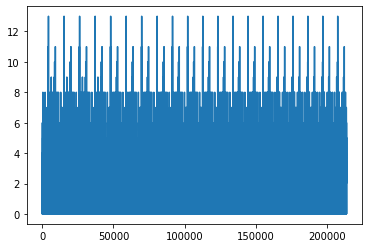

In [ ]:
df['학교_수'].plot()

In [ ]:
# df.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권특성 병합데이터fin.csv')
df.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권배후지특성 병합데이터fin.csv')